# Recession Indicators
Brian Howard
21 April 2019

In [1]:
library(UsingR)
library(quantmod)
library(ggplot2)
library(grid)
library(gridExtra)
library(knitr)
library(kableExtra)
library(tools)
library(zoo)
library(signal)
library(stringr)
library(corrplot)
library(caret)
library(rpart)
library(rpart.plot)
library(randomForest)
library(Quandl)
library(nnet)
#library(devtools)
#install_github("andrewuhl/RollingWindow")
library(RollingWindow)
library(gtable)
library(data.table)
library(readxl)

Loading required package: MASS
Loading required package: HistData
Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units


Attaching package: 'UsingR'

The following object is masked from 'package:survival':

    cancer

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: 'quantmod'

The following object is masked from 'package:Hmisc':

    Lag


Attaching package: 'sign

Call helper functions

In [2]:
source("plotHelper.r")

Define the source of the data (local or web) and whether to update the models.

In [3]:
b.refresh.models = FALSE

Define the plotting ranges

In [4]:
dt.recent = as.Date("2017-01-01")

Load up the off-line data

In [5]:
load("C:/Users/Rainy/OneDrive//RecessionIndicator_Buffer.RData")

This snippet is needed because some of the ticker symbols include are invalid variable names so re-cast those variable names.

In [6]:
df.symbols$string.symbol <-
  str_replace_all(df.symbols$string.symbol, "[^[:alnum:]]", "")

Do the interpolation to daily samples and tidy the data

In [7]:
source("calcInterpolate.r")

In [8]:
df.data <- calcInterpolate(df.data, df.symbols)

Warning message in merge.xts(xtsData, get(df.symbols$string.symbol[idx])):
"NAs introduced by coercion"

Create aggreagate data series
Some analysis requires that two or more series be combined. For example, normallizing debt by GDP to get a sense of the proportion of debt to the total economy helps understand the debt cycle.

In [9]:
source("calcAggregateSeries.r")

Calculate the year-over-year, 50 day moving average, and other features in the data

In [10]:
source("calcFeatures.r")

In [11]:
lst.df <- calcFeatures(df.data, df.symbols)
df.data <- lst.df[[1]]
df.symbols <- lst.df[[2]]

[1] "USREC has zero or negative values. Log series will be zero."
[1] "TNX.Volume has zero or negative values. Log series will be zero."
[1] "DTB3 has zero or negative values. Log series will be zero."
[1] "IRX.Volume has zero or negative values. Log series will be zero."
[1] "RLG.Volume has zero or negative values. Log series will be zero."
[1] "VXX.Volume has zero or negative values. Log series will be zero."
[1] "FYFSD has zero or negative values. Log series will be zero."
[1] "FYFSGDA188S has zero or negative values. Log series will be zero."
[1] "EES.Volume has zero or negative values. Log series will be zero."
[1] "VGSTX.Volume has zero or negative values. Log series will be zero."
[1] "VFINX.Volume has zero or negative values. Log series will be zero."
[1] "TMFGX.Volume has zero or negative values. Log series will be zero."
[1] "HAINX.Volume has zero or negative values. Log series will be zero."
[1] "IVOO.Volume has zero or negative values. Log series will be zero."
[1] "VO.Volu

These are auxilliary series that use the YoY and smoothed data.

In [12]:
source("calcFeaturesAggregate.r")

Build the recession data frame

In [13]:
source("calcRecession.r")

In [14]:
source("calcRecession.r")

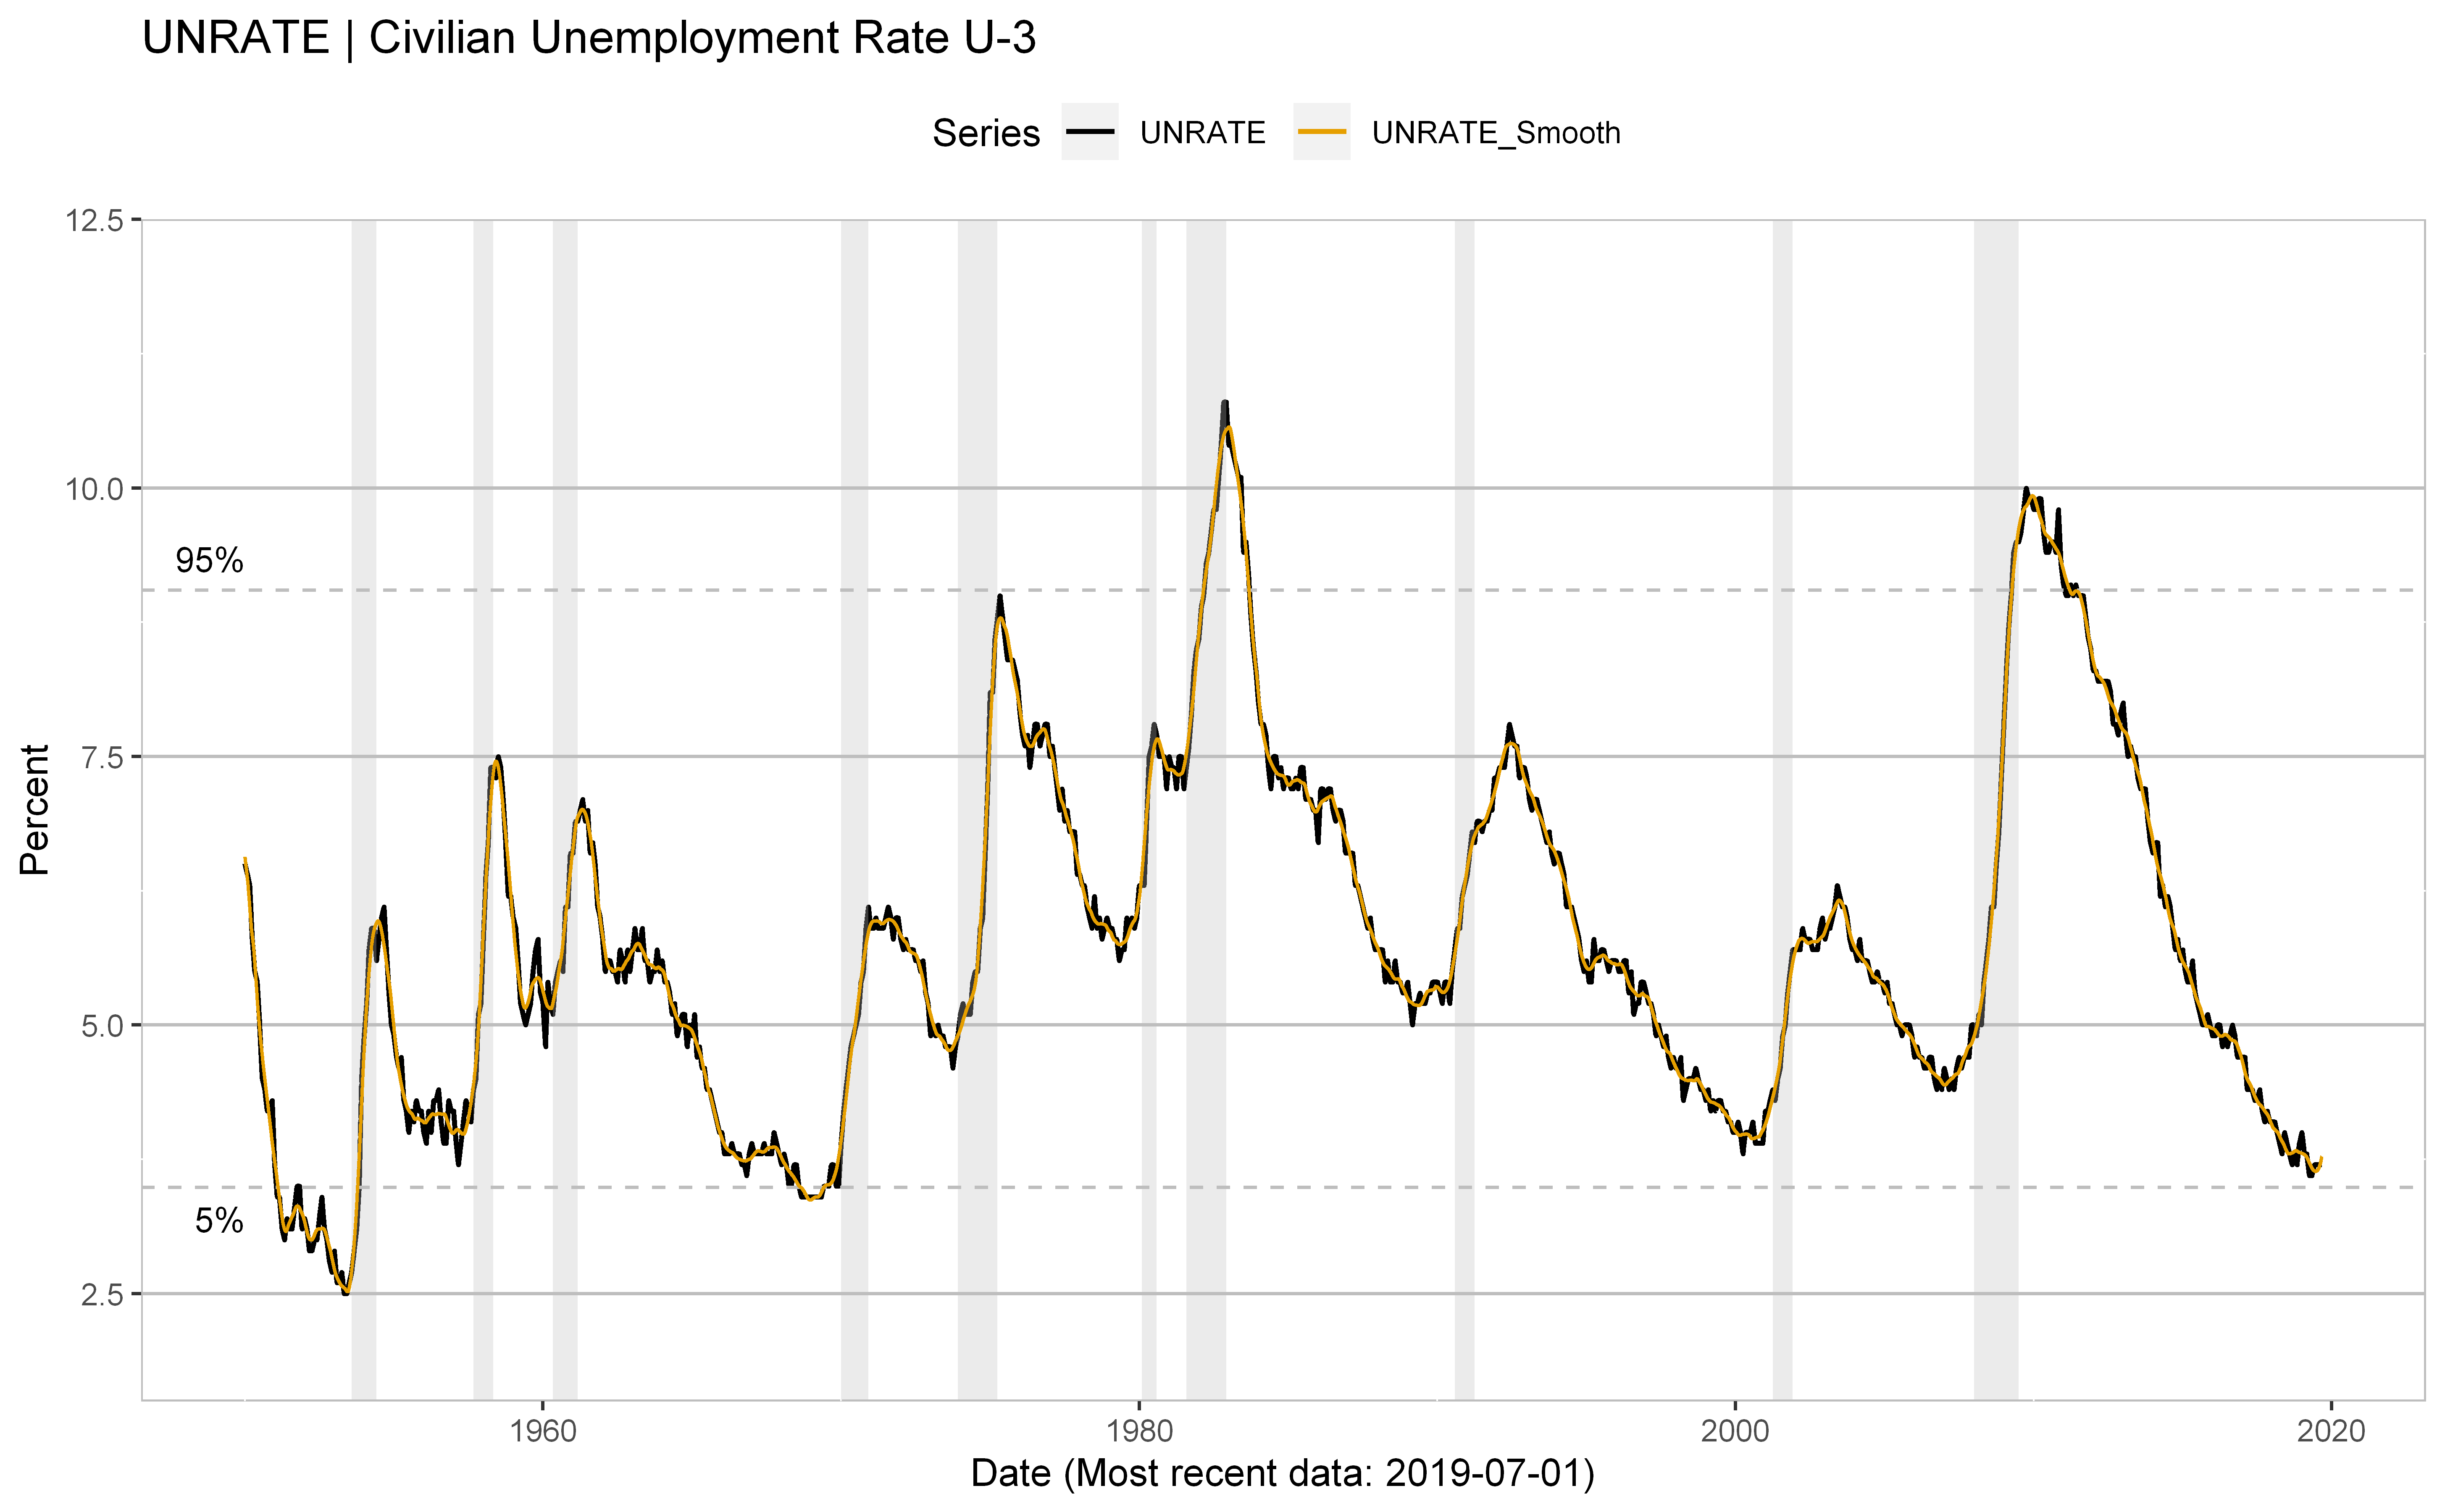

In [15]:
options(repr.plot.width = 9.7, repr.plot.height = 6, repr.plot.res = 600)
datay <- "UNRATE"
datay_aux <- "UNRATE_Smooth"
ylim <- c(2, 12)
b.legend <- TRUE
b.percentile <- TRUE
myPlot <- plotSingle(dfRecession, df.data, "date", datay, getPlotTitle(df.symbols, datay), "Date", 
            getPlotYLabel(df.symbols, datay), c(as.Date("1jan1950","%d%b%Y"), Sys.Date()), ylim, b.legend, b.percentile)
myPlot + geom_line(data=df.data, aes_string(x="date", y=datay_aux, colour=shQuote(datay_aux)), na.rm = TRUE)

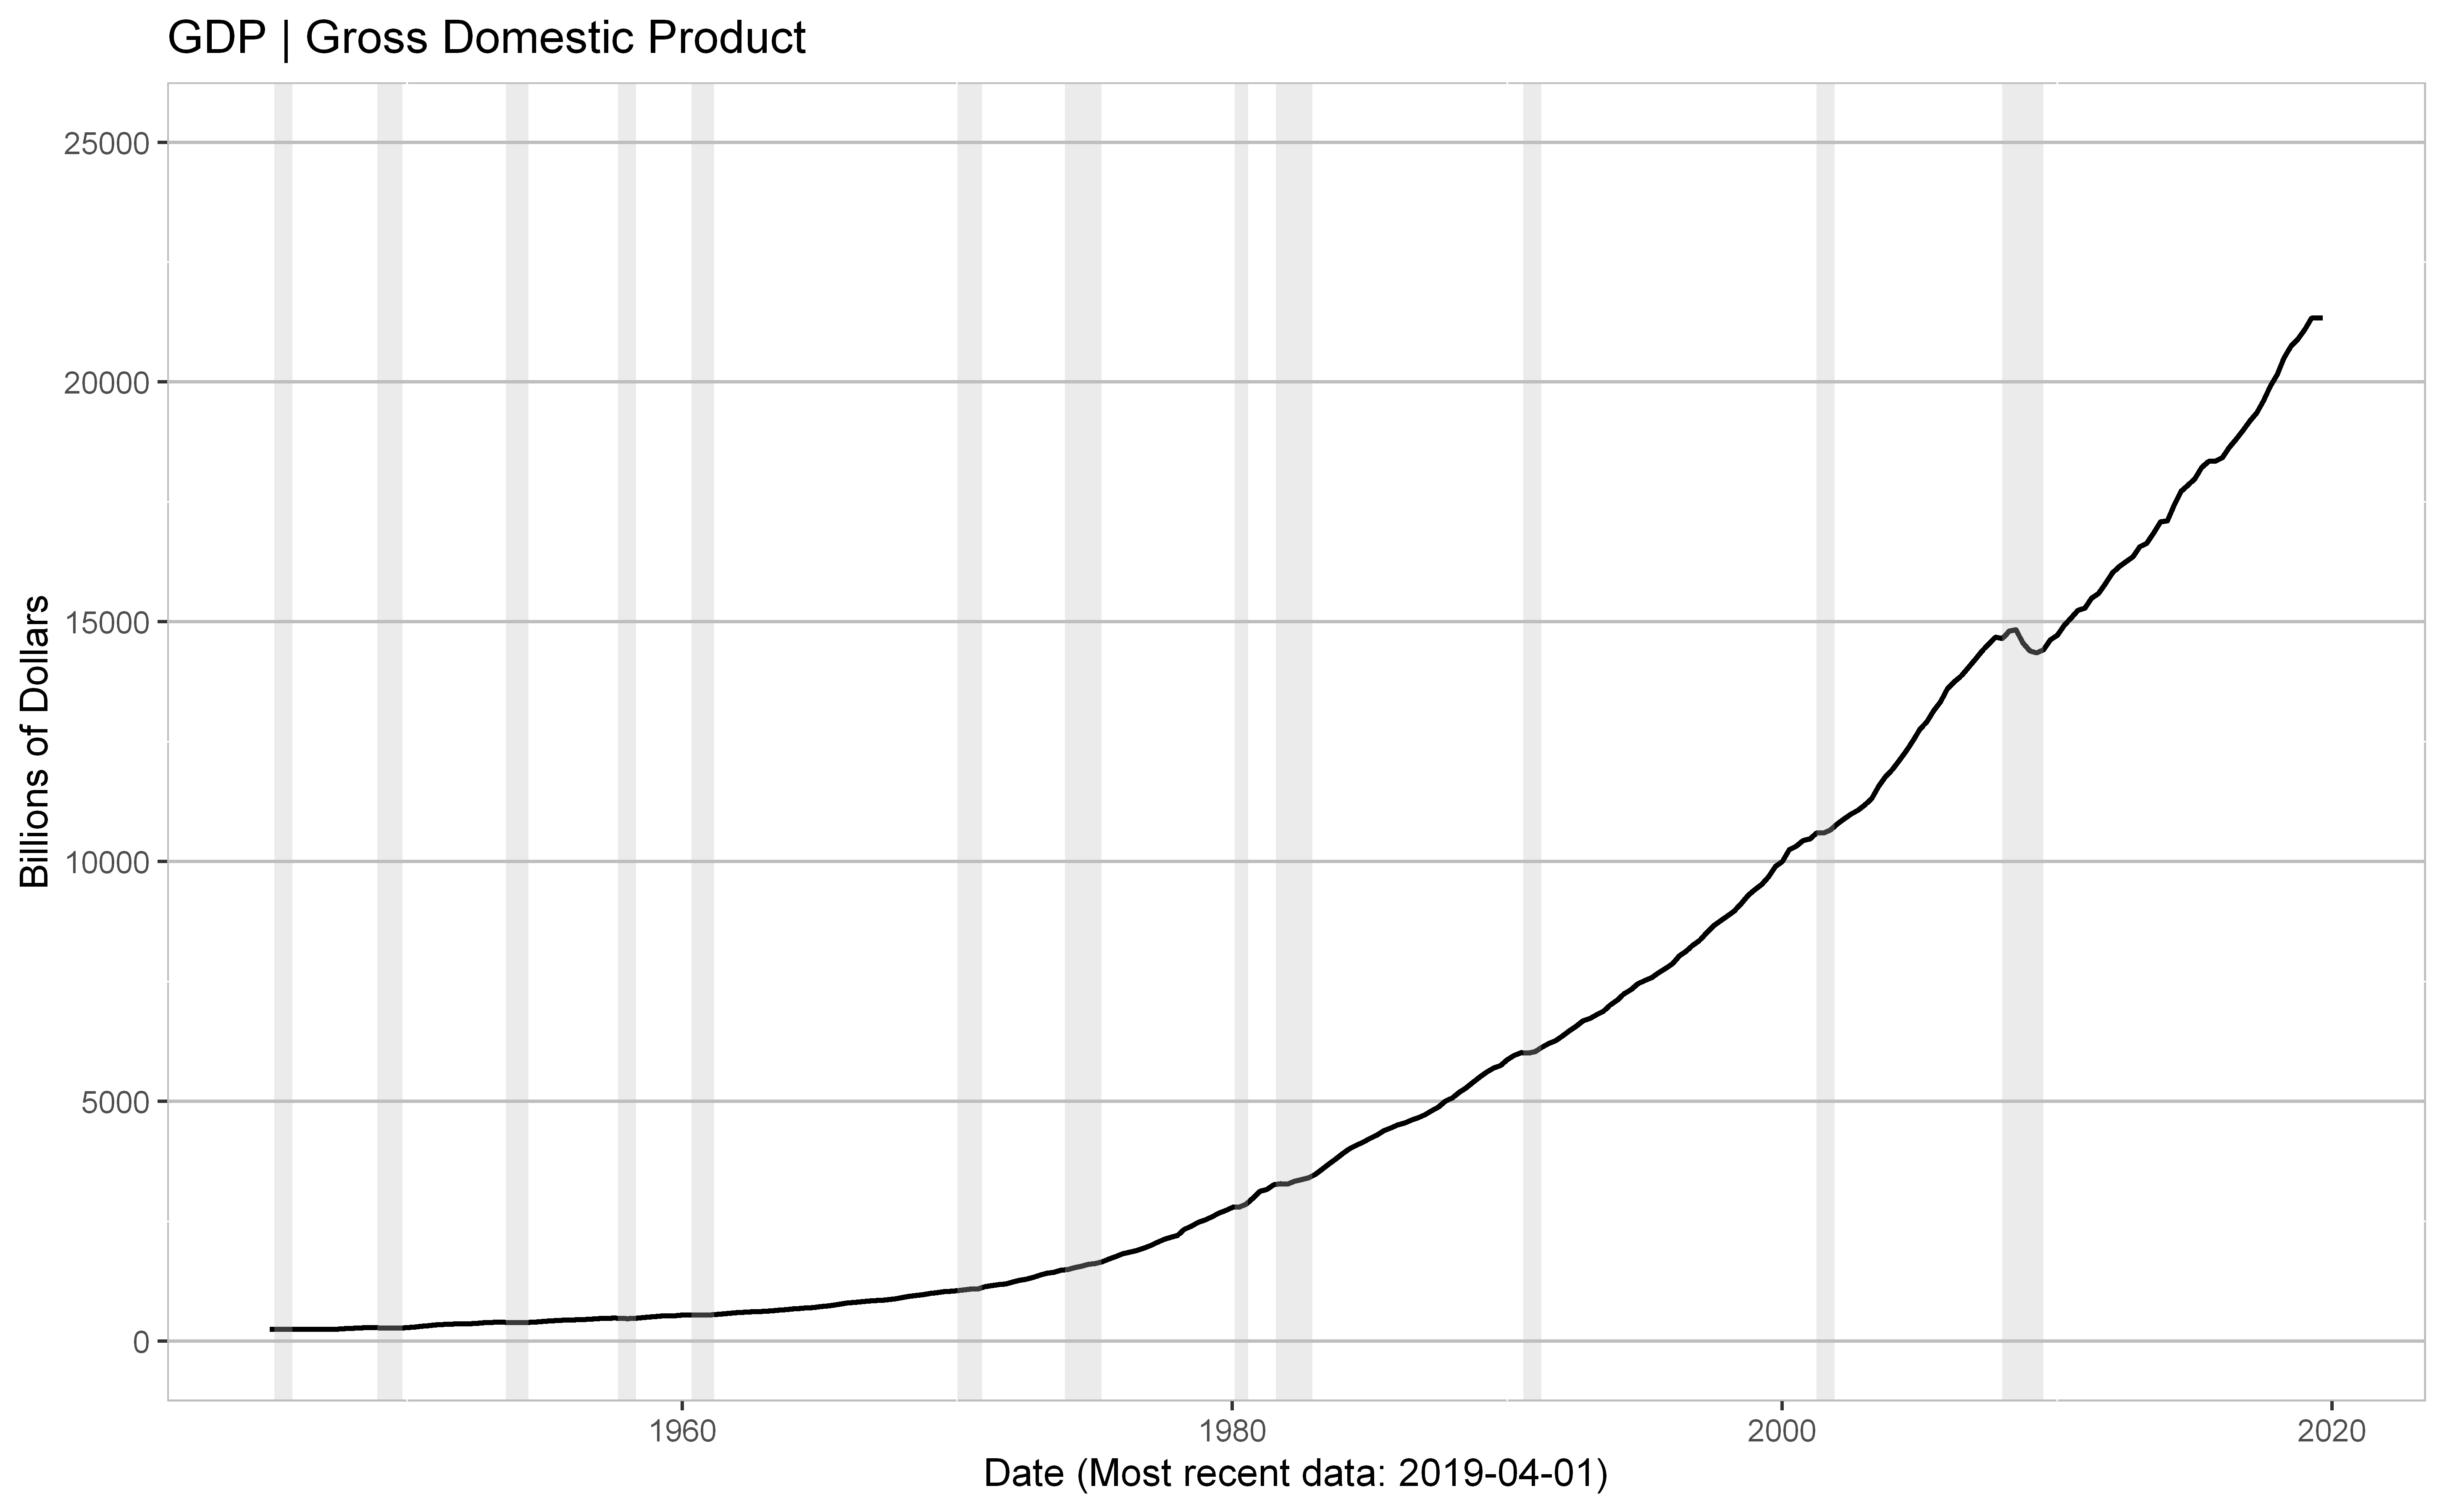

In [16]:
options(repr.plot.width = 9.7, repr.plot.height = 6, repr.plot.res = 600)
datay <- "GDP"
ylim <- c(1, 25000)
plotSingleQuick(dfRecession, df.data, datay, ylim)

In [17]:
df.data$CPROFIT.by.GDP <- (df.data$CPROFIT / df.data$GDP) * 100

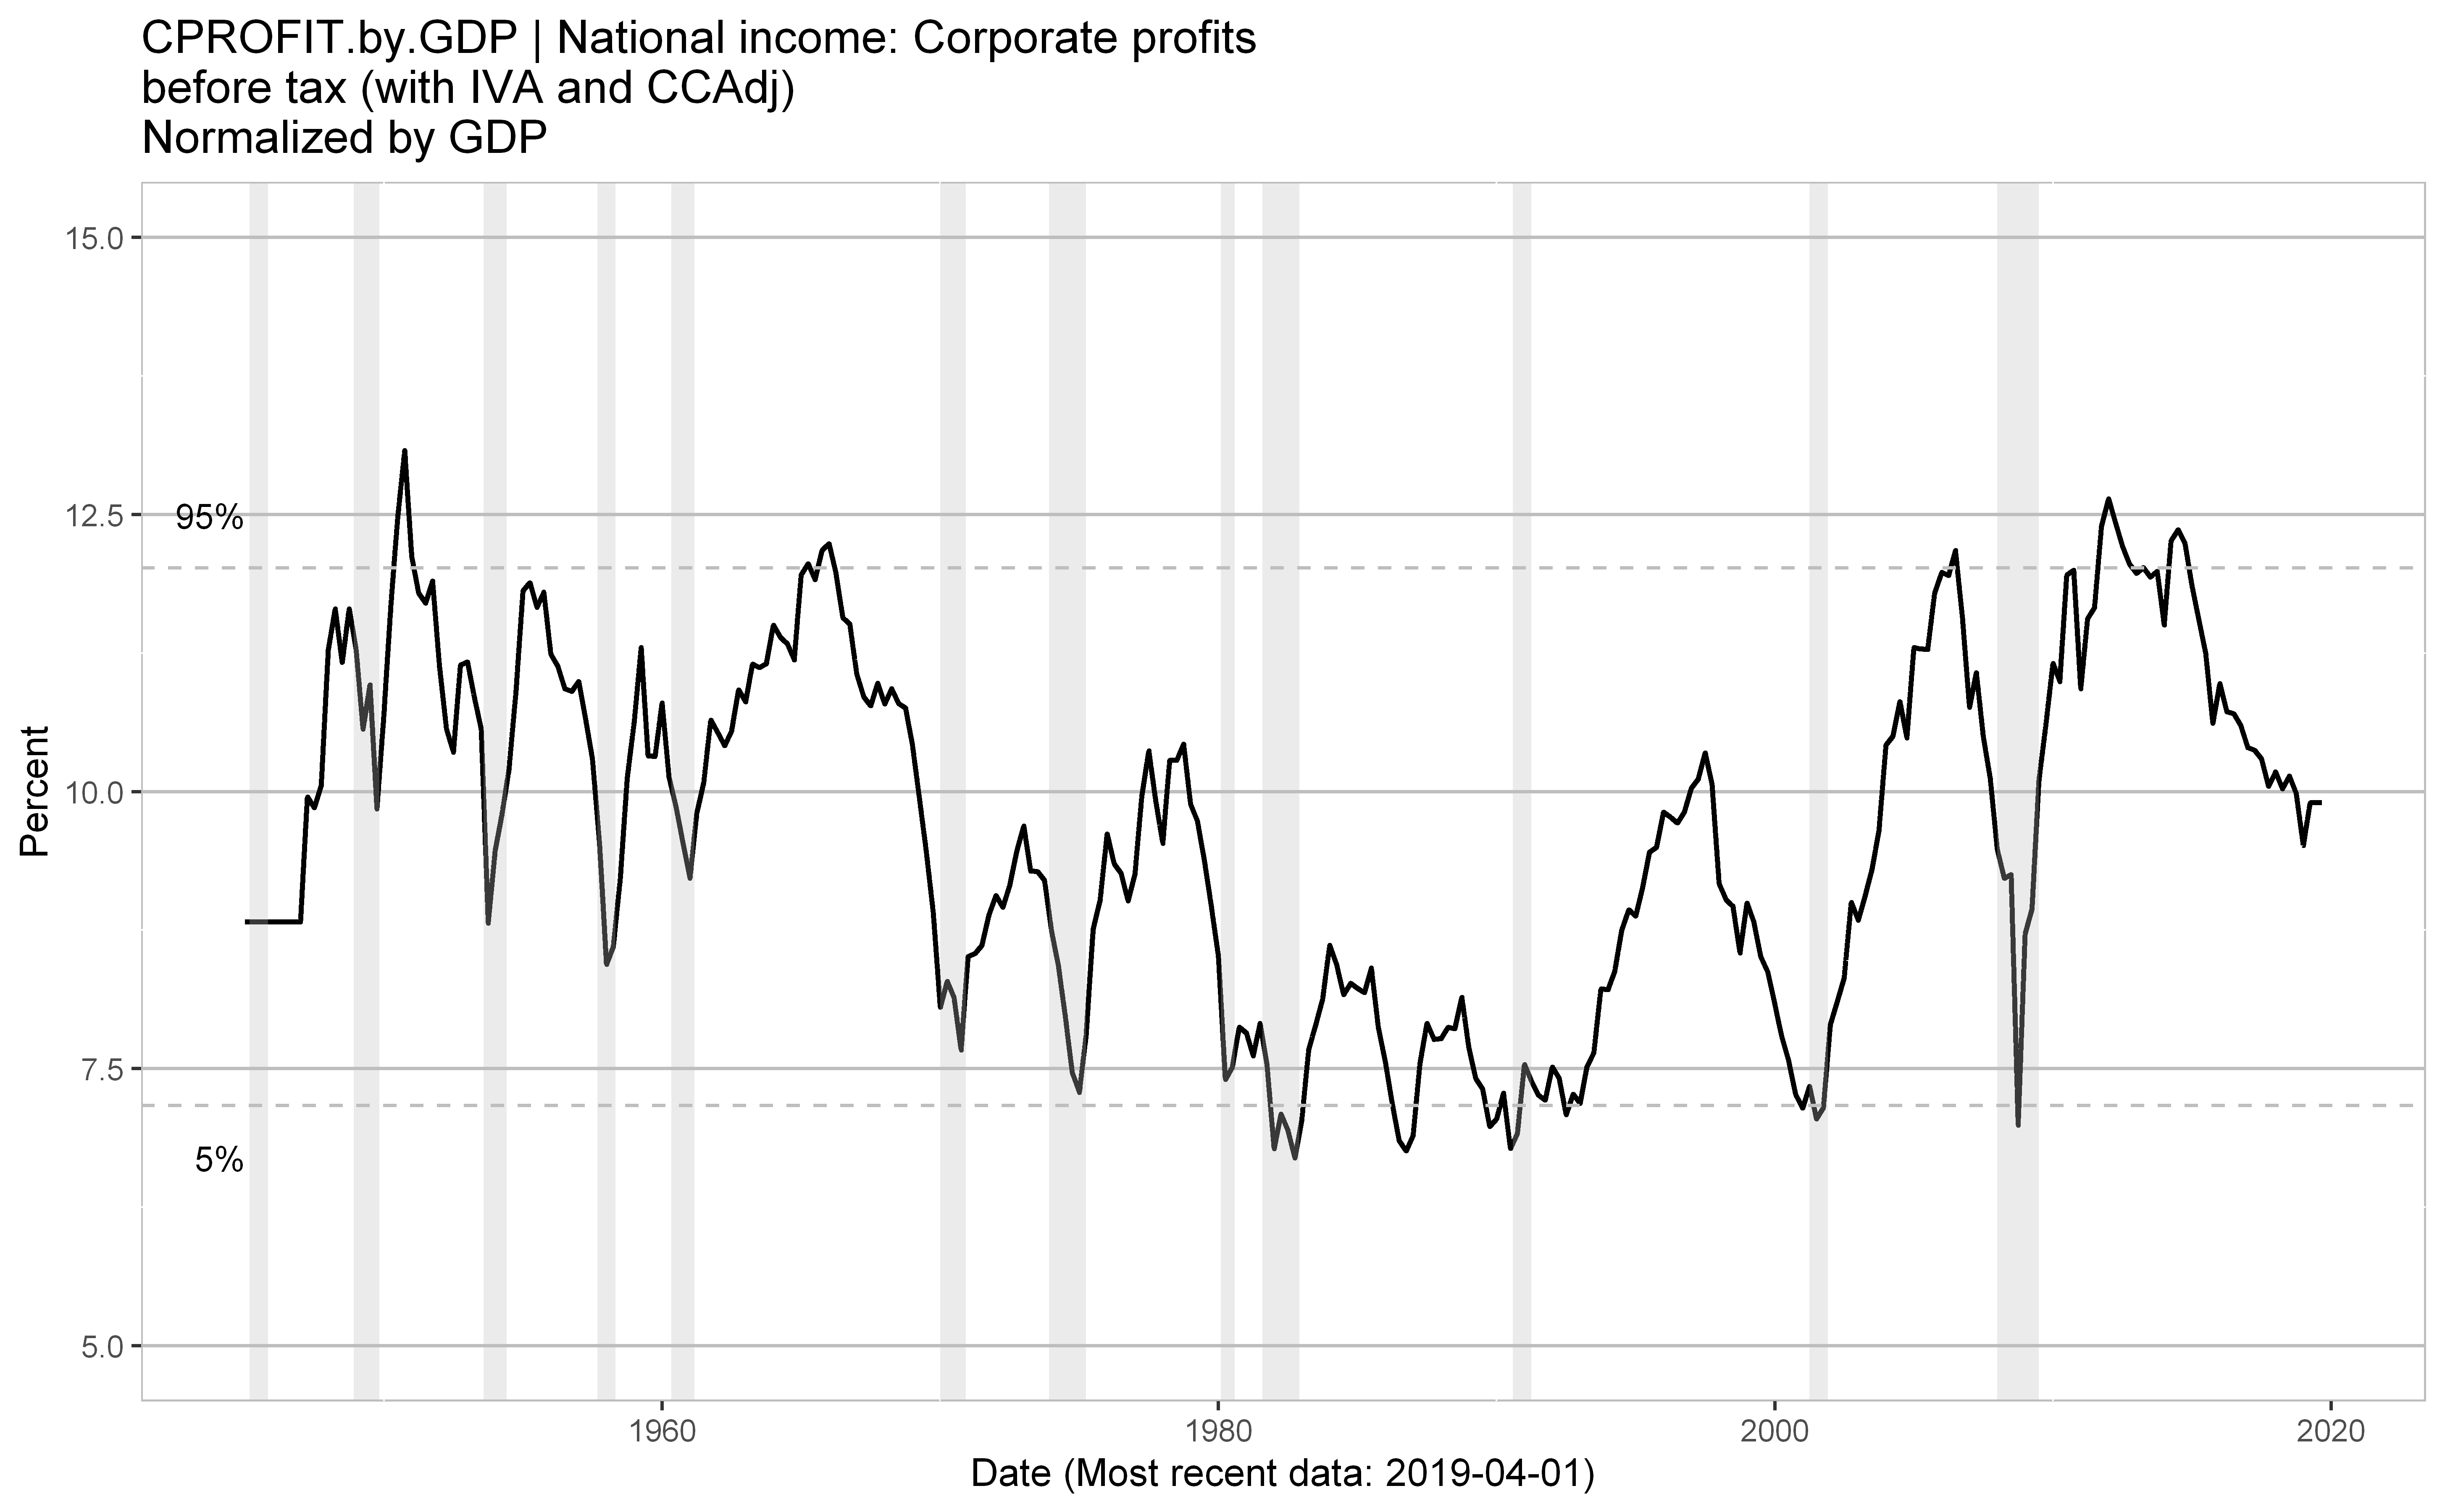

In [18]:
options(repr.plot.width = 9.7, repr.plot.height = 6, repr.plot.res = 600)
datay <- "CPROFIT.by.GDP"
ylim <- c(5, 15)
plotSingleQuick(dfRecession, df.data, datay, ylim, b.percentile = TRUE)